In [23]:
from src.utils import get_project_root
import os 

root = get_project_root()
raw_data_path = os.path.join(root, 'data', 'raw', 'election')
json_data_path = os.path.join(root, 'data', 'processed', 'election')

In [24]:
from src.similarity import *
import pandas as pd
import json
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


normalization: ignores frequency (does not change)  
uncasing: ignores spelling(least meaningful)  
filter: ignores "neutral" hashtags  
n_neighbors: as name suggests

In [25]:
config = json.load(open('config/vector_compile.json'))
kws = config['keywords']
save_path = config['save_path']
vector_fp = config['vector_fp']
users_fp = config['user_fp']
fig_path = config['fig_path']
users_fp = '../q2_data/news/'
vector = pd.read_json('vector.json', typ = 'series')

# Comparison 1: normalized

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


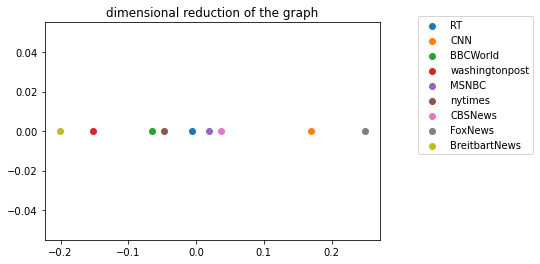

In [26]:
plot_embedding(users_fp, vector, save_path, fig_path=fig_path,normalize=True)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


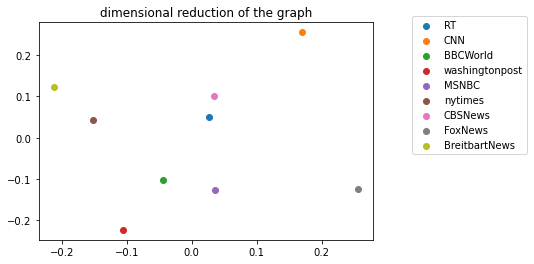

In [19]:
plot_embedding(users_fp, vector, save_path, normalize=True, dim=2)

# Comparison 2: unnormalized

In [22]:
plot_embedding(users_fp, vector, save_path, normalize=False)

TypeError: plot_embedding() missing 1 required positional argument: 'fig_path'

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


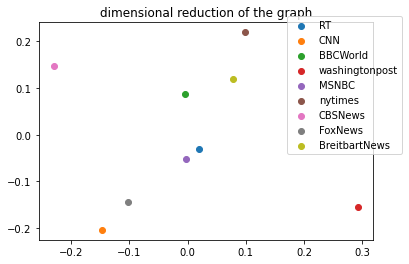

In [11]:
plot_embedding(users_fp, vector, save_path, normalize=False, dim=2)

# Comparison 3: normalized and keywords

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


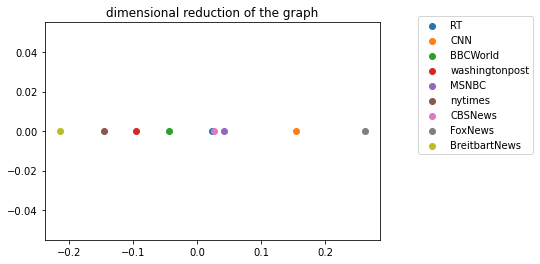

In [8]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = kws)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


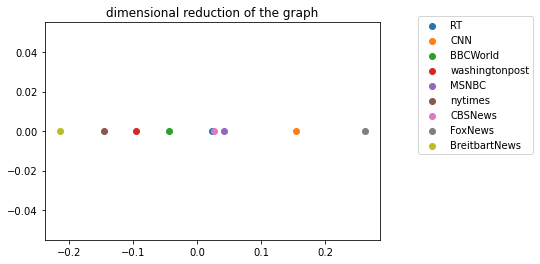

In [10]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = kws, n_neighbors = 2)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


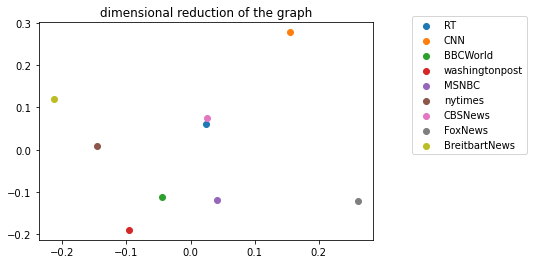

In [9]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = kws, dim=2)

../q2_data/news/RT_America_500_users.jsonl
../q2_data/news/CNN_500_users.jsonl
../q2_data/news/BBCWorld_500_users.jsonl
../q2_data/news/washingtonpost_500_users.jsonl
../q2_data/news/MSNBC_500_users.jsonl
../q2_data/news/nytimes_500_users.jsonl
../q2_data/news/CBSNews_500_users.jsonl
../q2_data/news/FoxNews_500_users.jsonl
../q2_data/news/BreitbartNews_500_users.jsonl


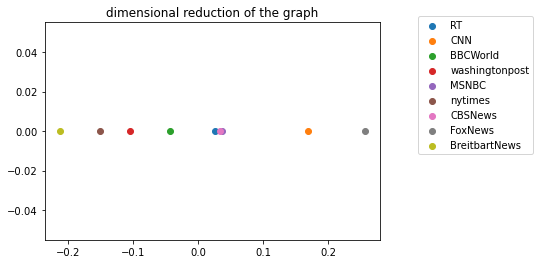

In [6]:
plot_embedding(users_fp, vector, save_path, normalize=True, kws = None, n_neighbors = 3)